In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# load stage PS
model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_2/',
              model_directory+'/irv/stage_2/',
              model_directory+'/neural_networks/stage_2/',
              model_directory+'/docking/stage_2/',
              model_directory+'/baseline/stage_2/']
gather_df_3 = gather_dir_metrics(class_dirs[0], 1)     
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[1], 1))   
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[2], 1))   
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[3], 1))
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[4], 1))

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df_3.columns[i] and 'Median' not in gather_df_3.columns[i]]
col_indices = [i for i in col_indices if 'PriA-SSB AS' in gather_df_3.columns[i]]
metric_names = list(gather_df_3.columns.values[col_indices])

gather_df_3 = gather_df_3[metric_names]
gather_df_3 = gather_df_3.dropna(axis=0)

#setup comparison matrix and overlaps
mm_comp_dicts_3 = get_mean_median_comps(gather_df_3, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict_3 = get_agg_comp(mm_comp_dicts_3, None, mean_w=1, median_w=0, tukey_w=0)
overlapping_models_3 = get_overlap(agg_comp_dict_3, N=1)

In [2]:
# load stage CV
model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5
gather_df_2 = gather_dir_metrics(class_dirs[0], k)     
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[1], k))   
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[2], 20))
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[3], k))
gather_df_2 = gather_df_2[metric_names]
gather_df_2 = gather_df_2.dropna(axis=0)

#setup comparison matrix and overlaps
dtk_dict = dtk_multi_metrics(gather_df_2, col_indices=[i for i in range(len(metric_names))])
dtk_analysis_dict = analyze_dtk_dict(dtk_dict)
mm_comp_dicts_2 = get_mean_median_comps(gather_df_2, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict_2 = get_agg_comp(mm_comp_dicts_2, dtk_analysis_dict, mean_w=0, median_w=0, tukey_w=1)
overlapping_models_2 = get_overlap(agg_comp_dict_2, N=1)

---
## Compare Model Orderings

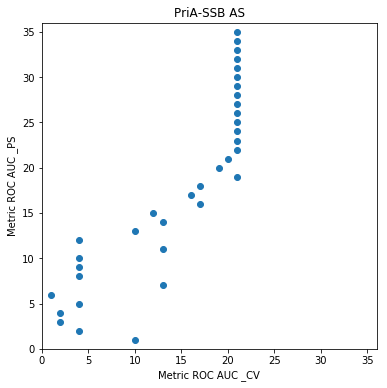

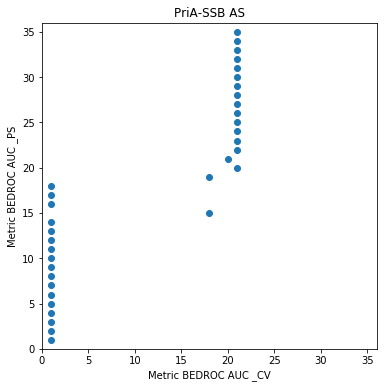

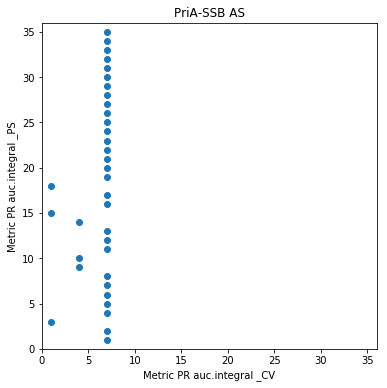

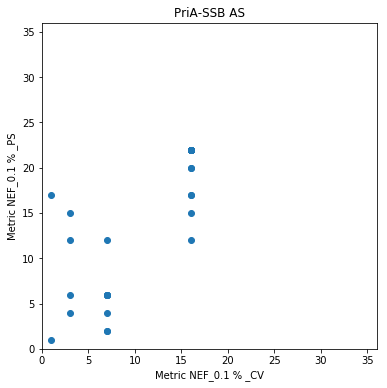

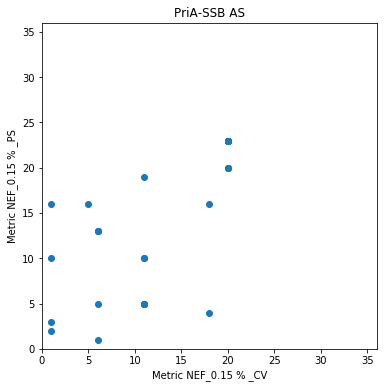

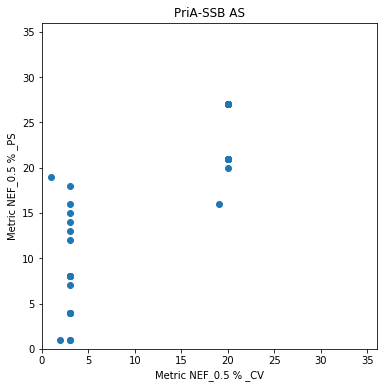

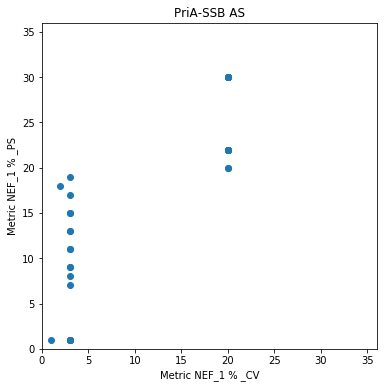

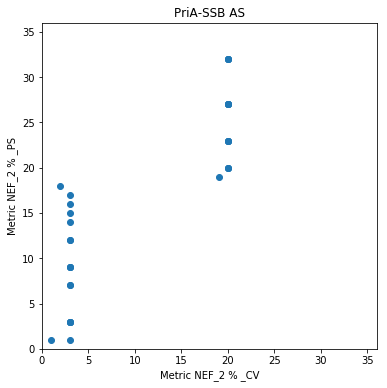

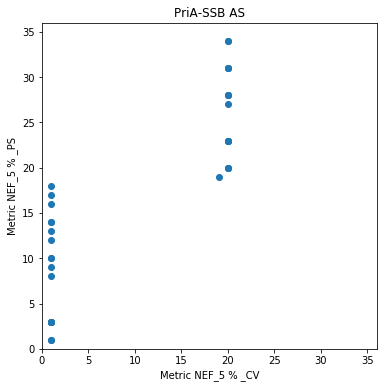

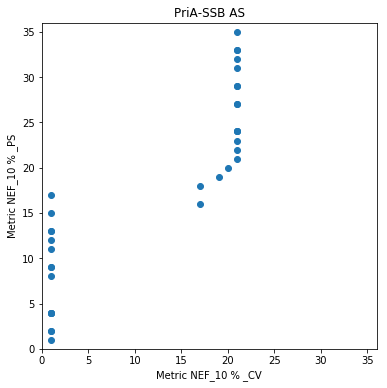

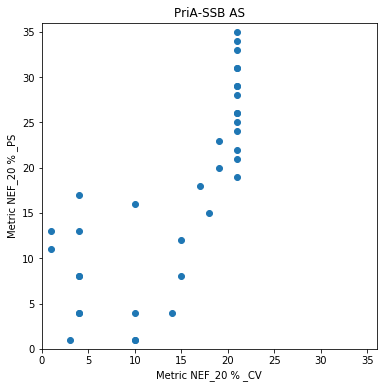

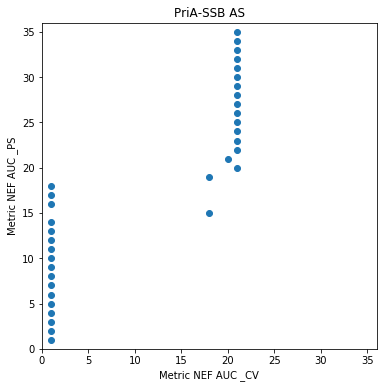

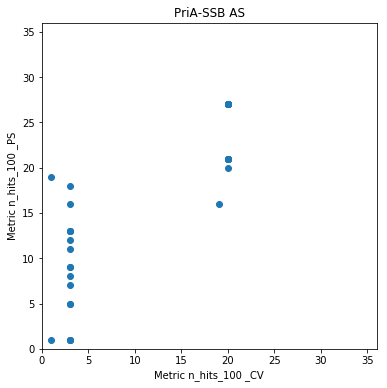

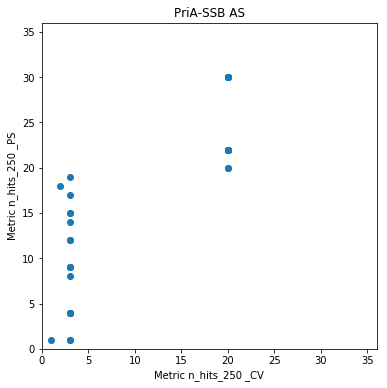

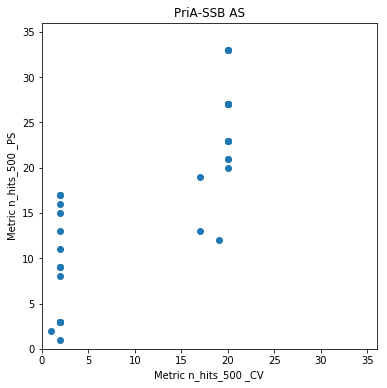

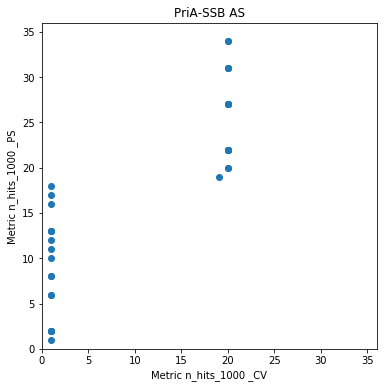

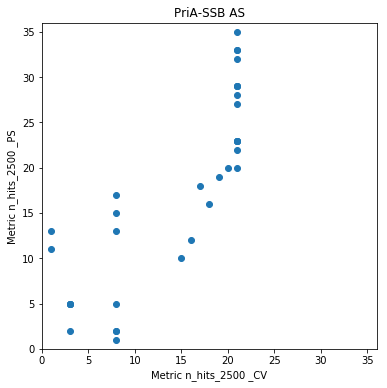

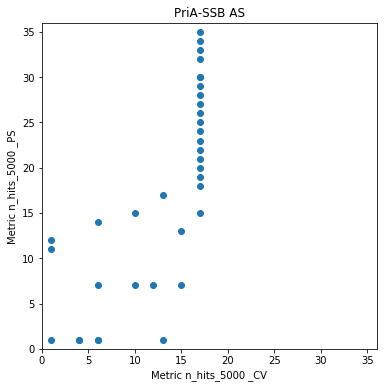

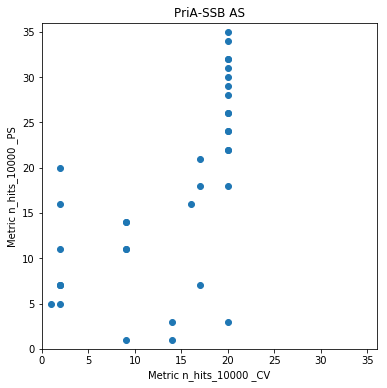

In [3]:
winscore_df_2 = get_model_winscores(agg_comp_dict_2, metric_names)
winscore_df_3 = get_model_winscores(agg_comp_dict_3, metric_names)
winscore_spearman_df = compare_cv_ps_model_ranking(winscore_df_2, winscore_df_3)
plot_comparison_cv_ps(winscore_df_2, winscore_df_3, './cv_ps_figures/cv_ps_model_ordering_comparison/')

In [4]:
winscore_spearman_df

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
CV vs. PS,0.9158,0.887,0.2895,0.7997,0.8184,0.8503,0.8453,0.8596,0.8798,0.9074,0.8353,0.887,0.8515,0.8489,0.8829,0.8802,0.8711,0.8397,0.7245


---
## Overlapping top 1 and top 5 models over all metrics

In [5]:
overlapping_models_2 

,overlap_perc
RandomForest_h,0.5789
SingleClassification_a,0.5263
SingleClassification_b,0.4211
MultiClassification_b,0.4211
SingleRegression_b,0.4211
IRV_e,0.3684
SingleRegression_a,0.3158
RandomForest_d,0.3158
MultiClassification_a,0.3158
IRV_d,0.2632


In [6]:
overlapping_models_3

,overlap_perc
RandomForest_h,0.6316
RandomForest_g,0.4737
SingleRegression_a,0.2105
RandomForest_e,0.2105
RandomForest_d,0.1579
RandomForest_a,0.1053
RandomForest_b,0.1053
RandomForest_c,0.1053
RandomForest_f,0.0526
SingleClassification_b,0.0526


In [7]:
get_overlap(agg_comp_dict_2, N=5)

,overlap_perc
MultiClassification_b,0.8947
SingleRegression_b,0.8421
SingleClassification_a,0.7895
RandomForest_c,0.7895
RandomForest_d,0.7368
RandomForest_h,0.7368
IRV_e,0.7368
RandomForest_a,0.7368
MultiClassification_a,0.7368
SingleClassification_b,0.7368


In [8]:
get_overlap(agg_comp_dict_3, N=5)

,overlap_perc
RandomForest_h,1.0000
RandomForest_g,0.8947
RandomForest_e,0.8421
RandomForest_c,0.6842
RandomForest_d,0.6316
RandomForest_b,0.5263
SingleRegression_a,0.4211
RandomForest_a,0.3684
RandomForest_f,0.3158
SingleClassification_b,0.1579


---
## Spearman's Ranking Comparison

In [9]:
spearman_df_2, ordered_spearman_df_2 = get_spearman_r(agg_comp_dict_2, metric_names[:-7], metric_names[-7:])
spearman_df_3, ordered_spearman_df_3 = get_spearman_r(agg_comp_dict_3, metric_names[:-7], metric_names[-7:])
diff_df, ordered_diff_df, spearman_df = compare_spearman_r(spearman_df_2, spearman_df_3)
diff_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
ROC AUC,0.0338,0.0194,0.0254,0.0103,0.0127,0.0508,0.1649
BEDROC AUC,0.0081,0.0124,0.0004,0.0044,0.0435,0.1088,0.1014
PR auc.integral,0.4811,0.5105,0.4783,0.4904,0.4923,0.4528,0.5628
NEF_0.1 %,0.1201,0.0927,0.1151,0.0528,0.1964,0.2735,0.2136
NEF_0.15 %,0.0241,0.0402,0.0006,0.0281,0.1478,0.2304,0.0370
NEF_0.5 %,0.0066,0.0132,0.0119,0.0032,0.0534,0.0808,0.0268
NEF_1 %,0.0142,0.0034,0.0041,0.0013,0.0542,0.1098,0.0218
NEF_2 %,0.0114,0.0154,0.0303,0.0041,0.0566,0.0973,0.1003
NEF_5 %,0.0052,0.0061,0.0145,0.0041,0.0437,0.0866,0.0542
NEF_10 %,0.0008,0.0011,0.0048,0.0018,0.0438,0.0757,0.1330


In [10]:
ordered_diff_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF_10 %,NEF_10 %,BEDROC AUC,NEF_1 %,NEF_20 %,ROC AUC,NEF_1 %
1,NEF AUC,NEF_1 %,NEF_0.15 %,NEF_10 %,ROC AUC,NEF_20 %,NEF_0.5 %
2,NEF_5 %,NEF AUC,NEF_1 %,NEF_20 %,BEDROC AUC,NEF_10 %,NEF_0.15 %
3,NEF_0.5 %,NEF_5 %,NEF AUC,NEF_0.5 %,NEF_5 %,NEF_0.5 %,NEF_5 %
4,BEDROC AUC,BEDROC AUC,NEF_10 %,NEF_5 %,NEF_10 %,NEF_5 %,NEF_2 %
5,NEF_2 %,NEF_0.5 %,NEF_0.5 %,NEF_2 %,NEF AUC,NEF_2 %,BEDROC AUC
6,NEF_1 %,NEF_2 %,NEF_5 %,BEDROC AUC,NEF_0.5 %,BEDROC AUC,NEF AUC
7,NEF_0.15 %,NEF_20 %,NEF_20 %,NEF AUC,NEF_1 %,NEF_1 %,NEF_10 %
8,NEF_20 %,ROC AUC,ROC AUC,ROC AUC,NEF_2 %,NEF AUC,ROC AUC
9,ROC AUC,NEF_0.15 %,NEF_2 %,NEF_0.15 %,NEF_0.15 %,NEF_0.15 %,NEF_0.1 %


In [11]:
spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
CV vs. PS,0.7391,0.8266,0.7846,0.9212,0.8652,0.8336,-0.1086


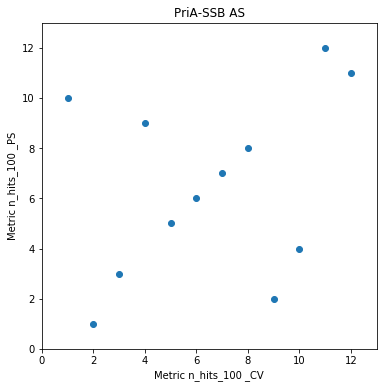

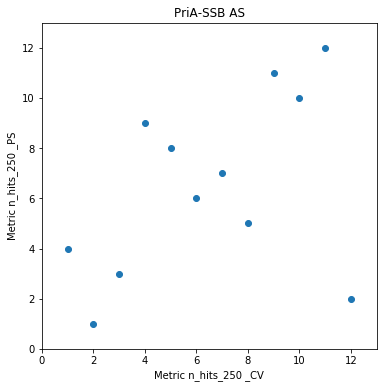

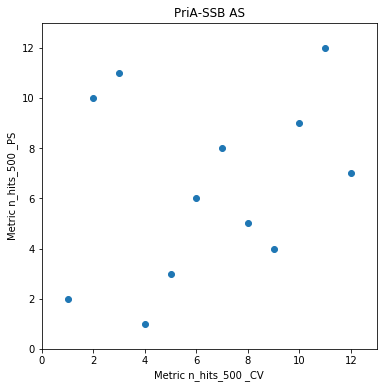

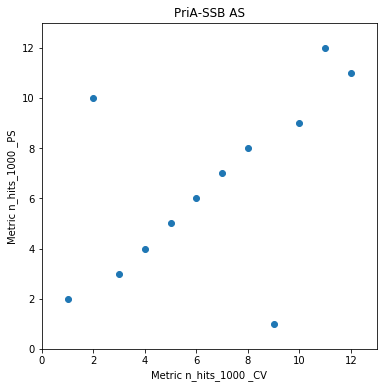

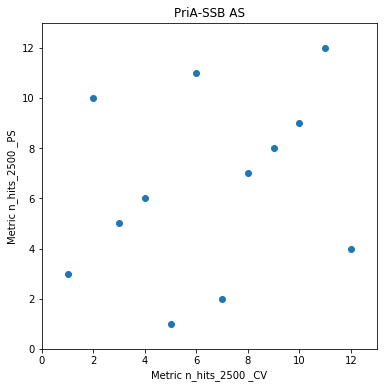

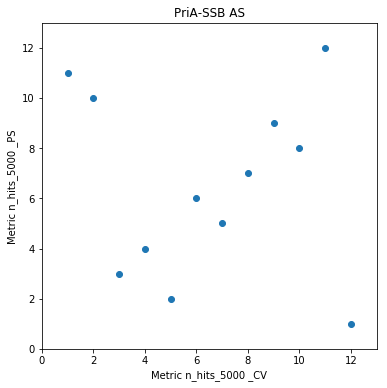

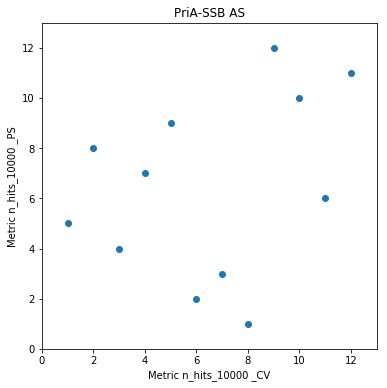

In [12]:
plot_comparison_cv_ps(ordered_spearman_df_2, ordered_spearman_df_3, './cv_ps_figures/cs_ps_scatter_plot_comparison/')